In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

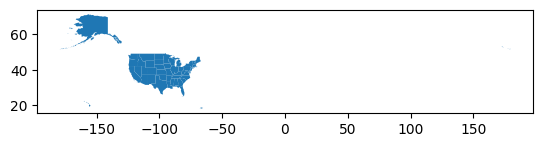

In [34]:
linkGitZip="https://github.com/plantilla-ICDE/plantillaGenerica/raw/refs/heads/main/cb_2018_us_state_20m.zip"
gdf1 = gpd.read_file(linkGitZip)
gdf1.head()
gdf1.plot()
gdf1.crs

Processing: bra_admbnda_adm1_ibge_2020.zip


,ADM0_EN,ADM0_PT,ADM0_PCODE,ADM1_PT,ADM1_PCODE,geometry
0,Brazil,Brasil,BR,Acre,BR12,"MULTIPOLYGON (((-68.87747 -11.01987, -68.88027..."
1,Brazil,Brasil,BR,Alagoas,BR27,"POLYGON ((-35.46317 -8.82467, -35.46457 -8.828..."
2,Brazil,Brasil,BR,Amapá,BR16,"MULTIPOLYGON (((-50.46147 2.11133, -50.45627 2..."
3,Brazil,Brasil,BR,Amazonas,BR13,"MULTIPOLYGON (((-58.49367 -0.84197, -58.48917 ..."
4,Brazil,Brasil,BR,Bahia,BR29,"MULTIPOLYGON (((-38.70687 -17.96447, -38.70867..."


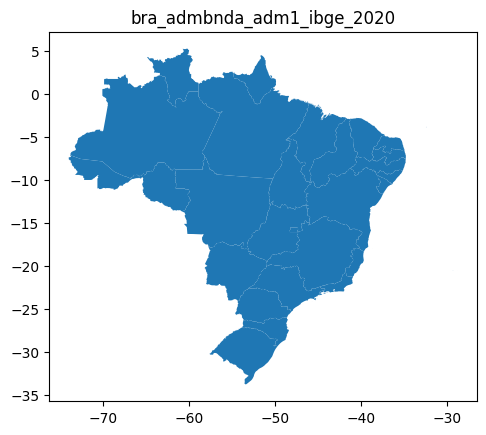

Processing: bra_admbnda_adm2_ibge_2020.zip


,ADM0_EN,ADM0_PT,ADM0_PCODE,ADM1_PT,ADM1_PCODE,ADM2_PT,ADM2_PCODE,ET_ID,geometry
0,Brazil,Brasil,BR,Rondônia,BR11,Alta Floresta D'Oeste,BR1100015,0,"POLYGON ((-62.0495 -11.86731, -62.04559 -11.86..."
1,Brazil,Brasil,BR,Rondônia,BR11,Ariquemes,BR1100023,1,"POLYGON ((-62.42279 -9.80481, -62.42688 -9.806..."
2,Brazil,Brasil,BR,Rondônia,BR11,Cabixi,BR1100031,2,"POLYGON ((-60.37329 -13.40887, -60.37323 -13.4..."
3,Brazil,Brasil,BR,Rondônia,BR11,Cacoal,BR1100049,3,"POLYGON ((-61.00061 -10.99219, -61.00061 -11.0..."
4,Brazil,Brasil,BR,Rondônia,BR11,Cerejeiras,BR1100056,4,"POLYGON ((-61.20642 -13.08759, -61.20282 -13.0..."


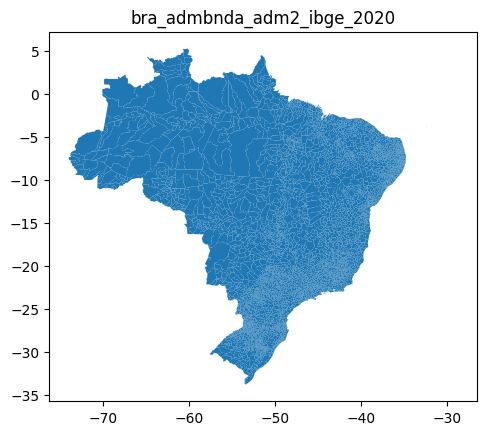

Processing: World_Countries.zip


,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


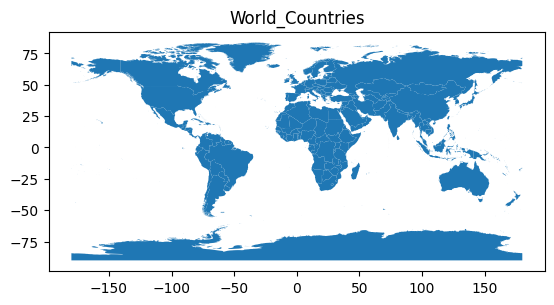

Processing: World_Cities.zip


,NAME,COUNTRY,CAPITAL,geometry
0,Murmansk,Russia,N,POINT (33.08604 68.96355)
1,Arkhangelsk,Russia,N,POINT (40.64616 64.52067)
2,Saint Petersburg,Russia,N,POINT (30.45333 59.95189)
3,Magadan,Russia,N,POINT (150.78001 59.571)
4,Perm',Russia,N,POINT (56.23246 58.00024)


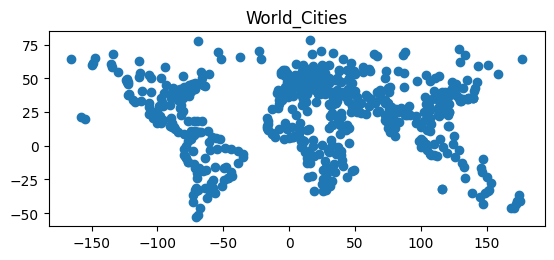

Processing: World_Hydrography.zip


,NAME,SYSTEM,geometry
0,Aldan,Lena,"LINESTRING (124.00678 56.47258, 123.25956 56.6..."
1,Amazon,Amazon,"MULTILINESTRING ((-61.2773 -3.60706, -60.68466..."
2,Amu Darya,None,"LINESTRING (73.98818 37.49952, 73.52595 37.528..."
3,Amur,None,"LINESTRING (122.63956 49.9973, 120.47874 49.25..."
4,Angara,None,"LINESTRING (105.07841 51.93053, 103.92959 51.7..."


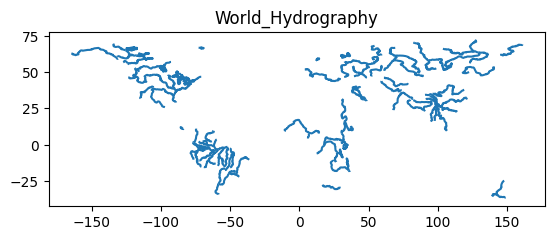

In [ ]:


# folder containing your map ZIPs
folder = Path("/Users/vinconig/Desktop/PUCP/ADE/Repos/Homework1/1IAS21-1/some_maps-20250902")


for zip_file in folder.glob("*.zip"):
    print(f"Processing: {zip_file.name}")
    
    # read shapefile data inside the ZIP
    gdf = gpd.read_file(zip_file)
    display(gdf.head())  # show first rows in Jupyter
    
    # plot the GeoDataFrame
    gdf.plot()
    plt.title(zip_file.stem)
    plt.show()# from zip




/opt/anaconda3/envs/1IAS21/lib/python3.13/site-packages/geopandas/array.py:1755: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  return GeometryArray(data, crs=_get_common_crs(to_concat))


<Axes: >

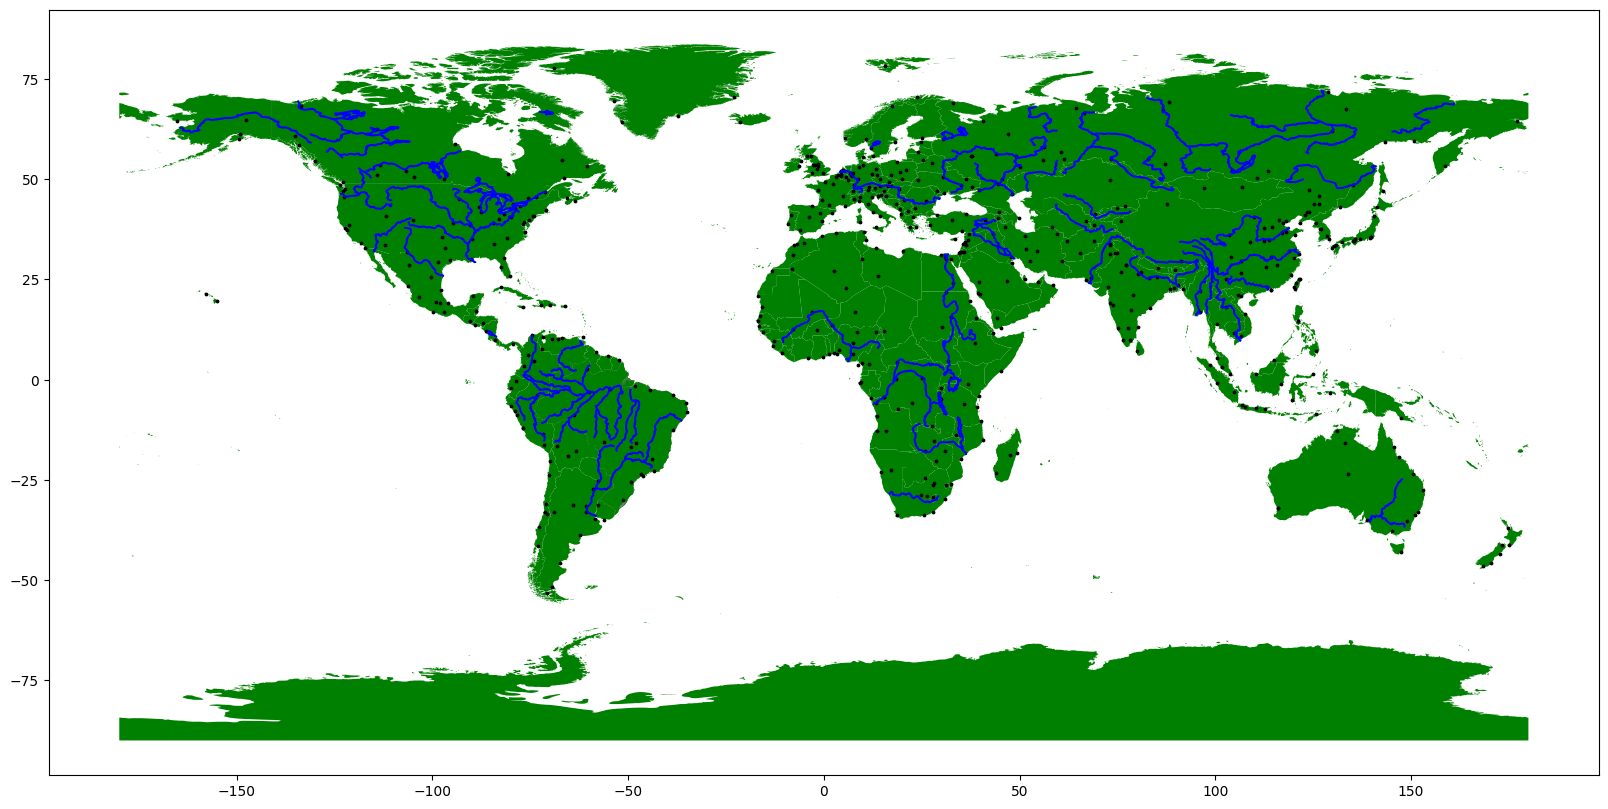

In [37]:

color_map = {
    "World_Countries" : "green",
    "World_Hydrography": "blue",
}
gdfs = []

# loop over all zips
for zip_file in folder.glob("*.zip"):
    gdf = gpd.read_file(zip_file)
    gdf["source"] = zip_file.stem   # add a column to identify source
    gdfs.append(gdf)

# 2. Combine them into one GeoDataFrame
combined = gpd.GeoDataFrame(
    pd.concat(gdfs, ignore_index=True),
    crs=gdfs[0].crs
)

# Assign colors to a new column
combined["color"] = combined["source"].map(color_map).fillna("gray")

# plot with different colors per source according to color_map
fig, ax = plt.subplots(figsize=(20, 12))

for gdf in gdfs:  # this respects the order from folder.glob() so that the World is mapped first, then cities and rivers on top
    src = gdf["source"].iloc[0]
    if src == "World_Cities":   # 👈 skip others here
        continue
    gdf.plot(ax=ax, color=color_map.get(src, "gray"), label=src)

cities = combined[combined["source"] == "World_Cities"]
cities.plot(ax=ax, color="black", markersize=3, label="Cities")
